# Pymaceuticals Inc.
---

### Analysis

- The correlation between mouse weight and the average tumor volume is 0.84. This indicates strong and positive linier relationship.
- when we checked Capomulin, Ramicane, Infubinol, Ceftamin drugs only Infubinol have potential outliers.
- The bar graph showed the Drug Regimen Capomulin has the maximum mice number 230, and Propriva has the smaller mice number 148.     
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
from random import randrange
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_df=pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
complete_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 118.4+ KB


In [3]:
# Checking the number of mice.
complete_df["Mouse ID"].nunique()

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
complete_df.groupby(["Mouse ID","Timepoint"]).size().sort_values()
#duplicate_values=complete_df.duplicated(subset=["Mouse ID","Timepoint"])
#duplicate_values.head()

Mouse ID  Timepoint
a203      0            1
q633      5            1
          0            1
q610      35           1
          30           1
                      ..
g989      20           2
          5            2
          10           2
          0            2
          15           2
Length: 1888, dtype: int64

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mask=complete_df["Mouse ID"]=="g989"
complete_df.loc[mask]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# clean_df=complete_df.drop_duplicates(subset=["Mouse ID","Timepoint"],keep=False) #not dropping all g989
mask=complete_df["Mouse ID"]!="g989"
clean_df=complete_df.loc[mask].reset_index(drop=True)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 117.6+ KB


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_variance = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_sds = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary = pd.DataFrame({"Mean Tumor Volume":tumor_mean,
                                "Median Tumor Volume":tumor_median,
                                "Tumor Volume Variance":tumor_variance,
                                "Tumor Volume Std. Dev.":tumor_sds,
                                "Tumor Volume Std. Err.":tumor_sem})
summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

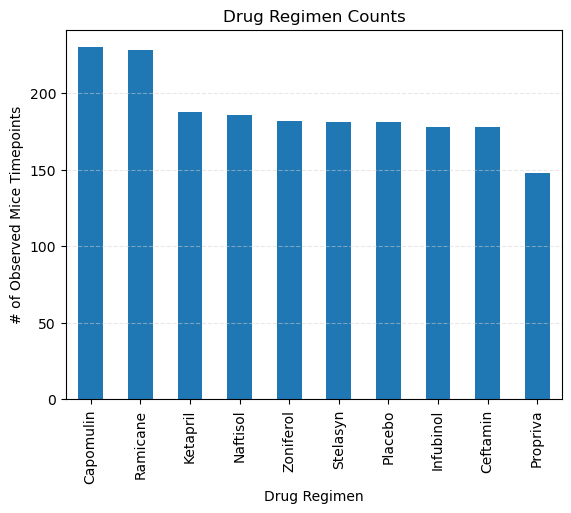

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
clean_df["Drug Regimen"].value_counts().sort_values(ascending=False).plot(kind="bar", title="Drug Regimen Counts", ylabel="# of Observed Mice Timepoints")
plt.grid(axis="y", color="lightgrey", linestyle = "--", alpha=0.5)
plt.show()

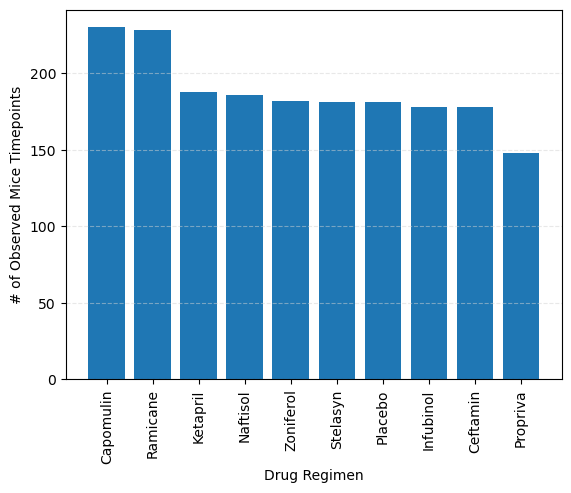

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
counts = clean_df["Drug Regimen"].value_counts()
plt.bar(counts.index.values, counts.values)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mice Timepoints")

plt.xticks(rotation=90)
plt.grid(axis="y", color="lightgrey", linestyle = "--", alpha=0.5)
plt.show()



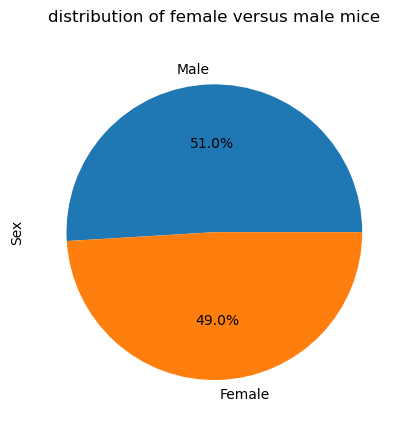

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
clean_df["Sex"].value_counts().plot(kind="pie", title="distribution of female versus male mice\n", autopct='%1.1f%%', ylabel="Sex")
plt.show()

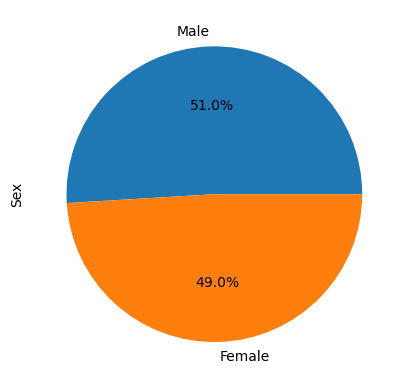

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

counts = clean_df.Sex.value_counts()
plt.pie(counts.values,labels=counts.index.values, autopct = '%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor_volume = clean_df.groupby(["Mouse ID"])["Timepoint"].max()
max_tumor_volume = max_tumor_volume.reset_index()



# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
cols=["Mouse ID", "Timepoint", "Drug Regimen", "Tumor Volume (mm3)", "Sex"]
subset=clean_df.loc[:,cols]

tumor_data = pd.merge(max_tumor_volume, subset,  on=['Mouse ID', 'Timepoint'])
drugs=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
mask=tumor_data["Drug Regimen"].isin(drugs)

tumor_data_drug = tumor_data.loc[mask].reset_index(drop=True)

tumor_data_drug

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3),Sex
0,a203,45,Infubinol,67.973419,Female
1,a251,45,Infubinol,65.525743,Female
2,a275,45,Ceftamin,62.999356,Female
3,a411,45,Ramicane,38.407618,Male
4,a444,45,Ramicane,43.047543,Female
...,...,...,...,...,...
95,y769,45,Ceftamin,68.594745,Female
96,y793,45,Capomulin,31.896238,Male
97,y865,45,Ceftamin,64.729837,Male
98,z578,45,Ramicane,30.638696,Male


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
drugs=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_drug = tumor_data_drug.loc[tumor_data_drug["Drug Regimen"]==drug,:]
    quartiles = tumor_vol_drug["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Determine outliers using upper and lower bounds
    outlier_vol = tumor_vol_drug.loc[(tumor_vol_drug['Tumor Volume (mm3)'] < lower_bound) | 
                                (tumor_vol_drug['Tumor Volume (mm3)'] > upper_bound)]
    if len(outlier_vol) == 0:  
        print(f"{drug}'s Potential outliers: 0")
    else:
        print(f"{drug}'s Potential outliers:\n{outlier_vol}")
    
    # add subset 
    tumor_vol_drug = tumor_vol_drug.loc[:,"Tumor Volume (mm3)"]
    tumor_vol_list.append(tumor_vol_drug)


Capomulin's Potential outliers: 0
Ramicane's Potential outliers: 0
Infubinol's Potential outliers:
   Mouse ID  Timepoint Drug Regimen  Tumor Volume (mm3)     Sex
15     c326          5    Infubinol           36.321346  Female
Ceftamin's Potential outliers: 0


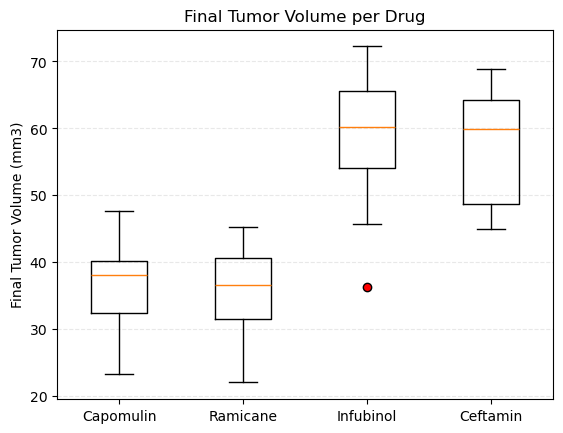

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
x=tumor_vol_list
plt.boxplot(x, labels=drugs, flierprops = dict(markerfacecolor = "red"))
plt.title("Final Tumor Volume per Drug")

plt.ylabel("Final Tumor Volume (mm3)", fontsize=10)
          
plt.grid(axis="y", color="lightgrey", linestyle = "--", alpha=0.5)
plt.show()

## Line and Scatter Plots

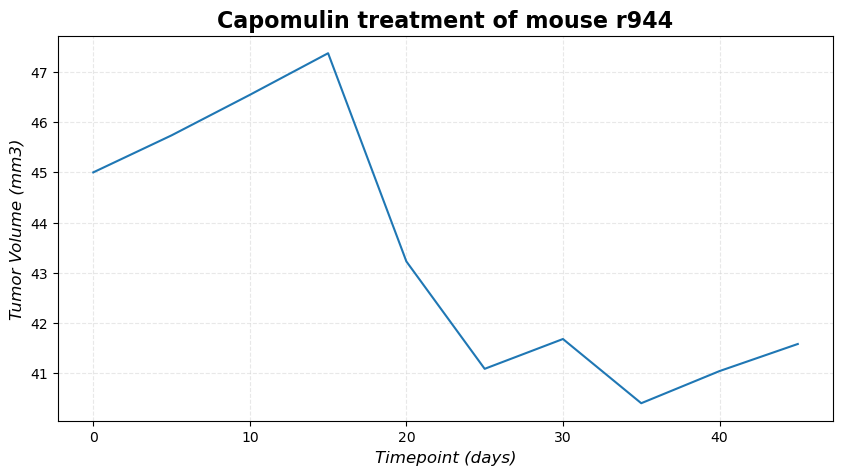

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data=clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"].reset_index(drop=True)
#selecting mouse randomly
random_mouse=randrange(len(capomulin_data.index))
mouse = capomulin_data.loc[random_mouse,"Mouse ID"]
mouse_data = clean_df.loc[clean_df["Mouse ID"] == mouse]
time = mouse_data["Timepoint"]
tumor_vol=mouse_data["Tumor Volume (mm3)"]
plt.figure(figsize=(10, 5))
plt.plot(time, tumor_vol)
plt.xlabel("Timepoint (days)", fontsize=12, fontstyle="italic")
plt.ylabel("Tumor Volume (mm3)", fontsize=12, fontstyle="italic")
plt.title(f"Capomulin treatment of mouse {mouse}", fontsize=16, fontweight="bold")
plt.grid(color="lightgrey", linestyle="--", alpha=0.5)
plt.show()


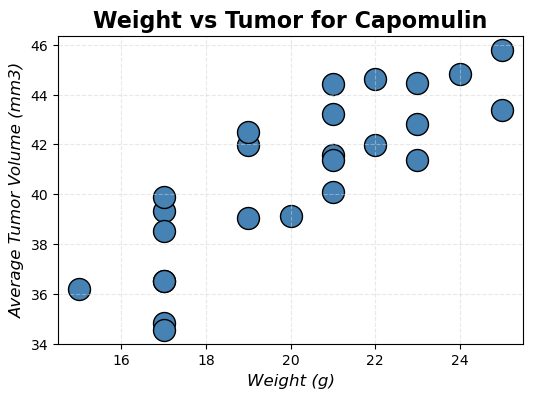

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
avergae_data = capomulin_data.groupby("Mouse ID").agg({"Weight (g)": "mean", 
                                                       "Tumor Volume (mm3)": "mean"}).reset_index()
x = avergae_data["Weight (g)"]
y = avergae_data["Tumor Volume (mm3)"]
plt.figure(figsize=(6, 4))
plt.scatter(x, y, facecolor="steelblue", edgecolor="black", s=250)
plt.xlabel("Weight (g)", fontsize=12, fontstyle="italic")
plt.ylabel("Average Tumor Volume (mm3)", fontsize=12, fontstyle="italic")
plt.title("Weight vs Tumor for Capomulin", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
plt.show()

## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(avergae_data['Weight (g)'],avergae_data['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84


The r-squared is: 0.709


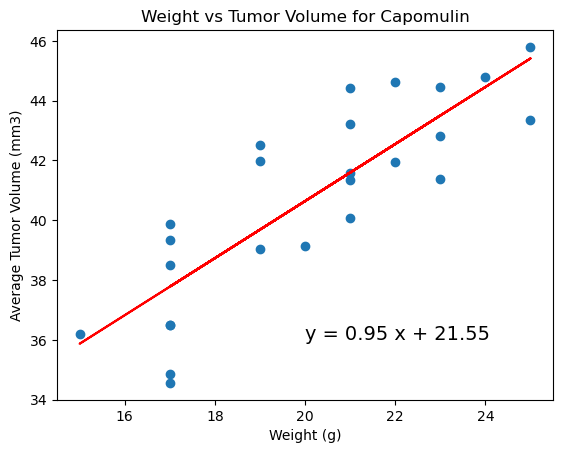

In [20]:
(slope, intercept,rvalue, pvalue, stderr)= linregress(avergae_data["Weight (g)"],
                                                      avergae_data["Tumor Volume (mm3)"])
regress_values=avergae_data["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(avergae_data["Weight (g)"],avergae_data["Tumor Volume (mm3)"])
plt.plot(avergae_data["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()